<a href="https://colab.research.google.com/github/Tanvir-Mahamood/Digital-Image-Processing/blob/main/DIP_Prac_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate a Gray Scalecale Image

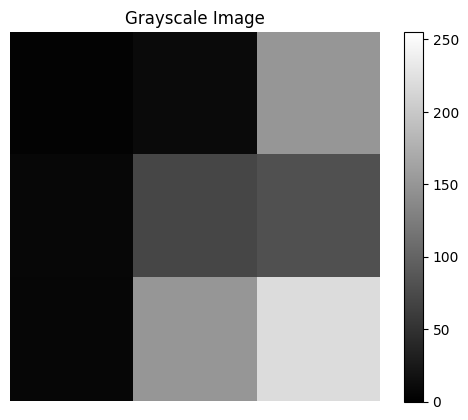

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Grayscale image as a 2D NumPy array
img = np.array([[3, 10, 150],
                [7, 70, 80],
                [6, 150, 220]], dtype=np.uint8)

# Display the image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()  # Optional: shows the scale bar
plt.title("Grayscale Image")
plt.axis('off')  # Optional: hides the axis ticks
plt.show()

Risize to 6X6 using diffeerent type of interpolation methods.

In [7]:
nearest = cv2.resize(img, (6,6), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img, (6,6), interpolation = cv2.INTER_LINEAR)
bicubic = cv2.resize(img, (6,6), interpolation = cv2.INTER_CUBIC)

print("Nearest Neighbour Interpolation")
print(nearest)
print("Bilinear Interpolation")
print(bilinear)
print("Bicubic Interpolation")
print(bicubic)

Nearest Neighbour Interpolation
[[  3   3  10  10 150 150]
 [  3   3  10  10 150 150]
 [  7   7  70  70  80  80]
 [  7   7  70  70  80  80]
 [  6   6 150 150 220 220]
 [  6   6 150 150 220 220]]
Bilinear Interpolation
[[  3   5   8  45 115 150]
 [  4   9  20  52 106 133]
 [  6  18  43  66  87  98]
 [  7  28  69  96 109 115]
 [  6  37  99 144 171 185]
 [  6  42 114 167 202 220]]
Bicubic Interpolation
[[  2   0   0  39 123 174]
 [  2   4   6  47 105 141]
 [  2  14  35  60  75  85]
 [  0  27  74 106 105 105]
 [  0  33 100 159 179 191]
 [  0  38 116 192 223 243]]


# Display all image

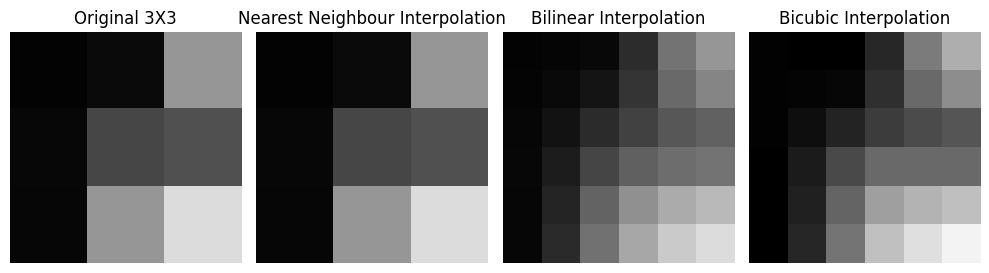

In [8]:
title = ['Original 3X3', 'Nearest Neighbour Interpolation', 'Bilinear Interpolation', 'Bicubic Interpolation']
images = [img, nearest, bilinear, bicubic]

plt.figure(figsize=(10, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Bilinear Interpolation (manually)

In [9]:
import math
Win = len(img[0])
Hin = len(img)
Wout = 6
Hout = 6
img_out = np.zeros((Hout, Wout), dtype=np.uint8)
W_scale = Win / Wout
H_scale = Hin / Hout

for i in range(Hout):
    for j in range(Wout):
        X = (j + 0.5) * W_scale - 0.5
        Y = (i + 0.5) * H_scale - 0.5

        X0 = math.floor(X)
        Y0 = math.floor(Y)

        X1 = min(X0 + 1, Win - 1)
        Y1 = min(Y0 + 1, Hin - 1)

        if X0 < 0 :
            X0 = 0
        if Y0 < 0 :
            Y0 = 0
        if X1 >= Win :
            X1 = Win - 1
            print("mara")
        if Y1 >= Hin :
            Y1 = Hin - 1
            print("mara")

        dx = X - X0
        dy = Y - Y0

        A = img[Y0, X0]
        B = img[Y0, X1]
        C = img[Y1, X0]
        D = img[Y1, X1]

        Top = A * (1 - dx) + B * dx
        Bottom = C * (1 - dx) + D * dx
        value = Top * (1 - dy) + Bottom * dy
        img_out[i, j] = round(value)
        """
        if i == 0 and j == 0:
            print(f"x={X}, y={Y}")
            print(f"X0={X0}, Y0={Y0}")
            print(f"X1={X1}, Y1={Y1}")
            print(f"A={A}, B={B}, C={C}, D={D}")
            print(f"Top={Top}, Bottom={Bottom}")
            print(f"value={value}")
        """

print(img_out)

[[  3   5   8  45 115 150]
 [  4   9  20  52 106 132]
 [  6  18  43  66  87  98]
 [  7  28  69  96 109 115]
 [  6  37  99 144 171 185]
 [  6  42 114 168 202 220]]


# Comaprison in both Bilinear Interpolation

In [12]:
print(img_out)
print(bilinear)

# Convert to int16 before calculating the difference to avoid potential issues with uint8
diff = abs(img_out.astype(np.int16) - bilinear.astype(np.int16))
print(diff)

[[  3   5   8  45 115 150]
 [  4   9  20  52 106 132]
 [  6  18  43  66  87  98]
 [  7  28  69  96 109 115]
 [  6  37  99 144 171 185]
 [  6  42 114 168 202 220]]
[[  3   5   8  45 115 150]
 [  4   9  20  52 106 133]
 [  6  18  43  66  87  98]
 [  7  28  69  96 109 115]
 [  6  37  99 144 171 185]
 [  6  42 114 167 202 220]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]
